In [61]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from data import load_data
print(tf.__version__)

2.1.0


In [62]:
(x_train, y_train), (x_test, y_test) = load_data()
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 60000
Number of original test examples: 10000


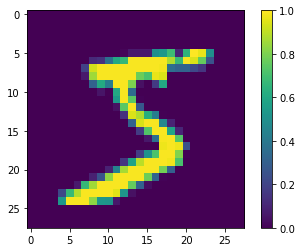

In [63]:
plt.imshow(x_train[0, :, :, 0])
plt.colorbar()

In [64]:
print(x_train.shape)
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)
print(x_train.shape,x_test.shape,y_train.shape)

(60000, 28, 28, 1)
(60000, 784) (10000, 784) (60000,)


In [65]:
initializer = tf.keras.initializers.he_normal()

In [66]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu',kernel_initializer=initializer),
    tf.keras.layers.Dense(64,activation='relu',kernel_initializer=initializer),
    tf.keras.layers.Dense(10,activation='softmax',kernel_initializer=initializer)
])

In [67]:
sgd=tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.0, nesterov=False, name='SGD'
)

In [68]:
model.compile(optimizer=sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [69]:
model.fit(x_train, y_train, epochs=20,batch_size=32,shuffle=False)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 97us/sample - loss: 1.6965 - accuracy: 0.7842
Epoch 2/20
60000/60000 [==============================] - 6s 92us/sample - loss: 1.6209 - accuracy: 0.8452
Epoch 3/20
60000/60000 [==============================] - 5s 90us/sample - loss: 1.6074 - accuracy: 0.8565
Epoch 4/20
60000/60000 [==============================] - 6s 99us/sample - loss: 1.5991 - accuracy: 0.8641
Epoch 5/20
60000/60000 [==============================] - 5s 84us/sample - loss: 1.5931 - accuracy: 0.8698
Epoch 6/20
60000/60000 [==============================] - 4s 64us/sample - loss: 1.5888 - accuracy: 0.8738
Epoch 7/20
60000/60000 [==============================] - 4s 62us/sample - loss: 1.5852 - accuracy: 0.8773
Epoch 8/20
60000/60000 [==============================] - 4s 61us/sample - loss: 1.5825 - accuracy: 0.8795
Epoch 9/20
60000/60000 [==============================] - 4s 61us/sample - loss: 1.5803 - accuracy: 0.8814
Epoch 10/20
60

In [70]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 1.4909 - accuracy: 0.9714

Test accuracy: 0.9714
